<a href="https://colab.research.google.com/github/Keerthana0290/stockmarketprediction/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install transformers

In [ ]:
!pip install --upgrade yfinance --no-cache-dir

COLLECTING STOCK DATA (USING YAHOO FINANCE)

In [ ]:
import yfinance as yf

data_gld=yf.download("GC=F", start="2022-01-01", end="2025-03-01")
data_gld.head()   #gc=f=gold futures

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2022-01-03,1799.400024,1830.099976,1798.800049,1830.099976,116
2022-01-04,1814.000000,1815.300049,1800.000000,1800.500000,38
2022-01-05,1824.599976,1824.599976,1813.099976,1813.099976,8
2022-01-06,1788.699951,1791.300049,1787.099976,1787.099976,30
2022-01-07,1797.000000,1797.000000,1784.400024,1791.800049,17


In [ ]:
data_s=yf.download("MCX.NS", start="2022-01-01", end="2025-03-02")
data_s.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MCX.NS,MCX.NS,MCX.NS,MCX.NS,MCX.NS
Date,,,,,
2022-01-03,1575.911865,1581.075004,1545.030781,1545.030781,418212
2022-01-04,1583.948730,1601.922205,1563.686103,1578.152477,433836
2022-01-05,1567.631348,1590.865353,1557.353945,1578.152411,364277
2022-01-06,1573.817383,1586.578962,1549.122125,1552.824012,353395
2022-01-07,1571.723022,1591.255024,1564.514154,1591.255024,216641


In [ ]:
data_s['Daily_Change'] = data_s['Open'] - data_s['Open'].shift(1)
data_s['Up_or_Down'] = data_s['Daily_Change'].apply(lambda x: 1 if x > 0 else 0)
data_s['Up_or_Down'].head()

,Up_or_Down
Date,
2022-01-03,0
2022-01-04,1
2022-01-05,0
2022-01-06,0
2022-01-07,1


In [ ]:
data_oil=yf.download("CL=F", start="2022-01-01", end="2025-03-01")
data_oil.head()  #cl=f=crude oil futures

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2022-01-03,76.080002,76.459999,74.269997,75.690002,317628
2022-01-04,76.989998,77.639999,75.699997,76.019997,372848
2022-01-05,77.849998,78.580002,76.510002,77.180000,397898
2022-01-06,79.459999,80.239998,76.730003,77.239998,476665
2022-01-07,78.900002,80.470001,78.519997,79.620003,414434


In [ ]:
data_silver=yf.download("SI=F", start="2022-01-01", end="2025-03-01")
data_silver.head()  #si=f=silver futures

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SI=F,SI=F,SI=F,SI=F,SI=F
Date,,,,,
2022-01-03,22.790001,23.309999,22.790001,23.309999,31
2022-01-04,23.038000,23.038000,22.955000,22.955000,7
2022-01-05,23.150000,23.150000,22.785000,23.139999,437
2022-01-06,22.174000,22.799999,22.049999,22.764999,103
2022-01-07,22.393999,22.393999,22.393999,22.393999,17


In [ ]:
data_ngas=yf.download("NG=F",start="2022-01-01", end="2025-03-01")
data_ngas.head()  #ng=f = natural gas futures

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
Date,,,,,
2022-01-03,3.815,3.858,3.638,3.702,99069
2022-01-04,3.717,3.944,3.709,3.817,133394
2022-01-05,3.882,3.897,3.717,3.747,96811
2022-01-06,3.812,3.931,3.801,3.842,116579
2022-01-07,3.916,3.980,3.800,3.860,127012


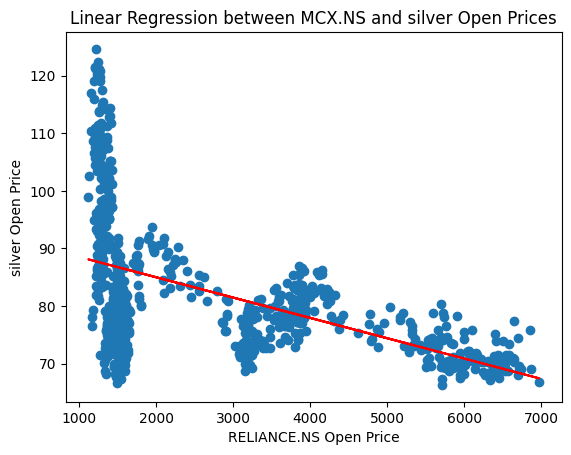

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Get the minimum length between data_s['Open'] and data_gld['Open']
min_len = min(len(data_s['Open']), len(data_gld['Open']))

# Truncate both series to the minimum length
X = data_s['Open'][:min_len]
y = data_oil['Open'][:min_len]

reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)  # Reshape X for LinearRegression

predictions_model1 = reg.predict(X.values.reshape(-1, 1)) # Assuming predictions_model1 is defined somewhere

plt.scatter(X, y)
plt.plot(X, predictions_model1, color='red')  # Regression line, using X for plotting
plt.xlabel("RELIANCE.NS Open Price")  # Updated x-axis label
plt.ylabel("silver Open Price")    # Updated y-axis label
plt.title("Linear Regression between MCX.NS and silver Open Prices")  # Updated title
plt.show()

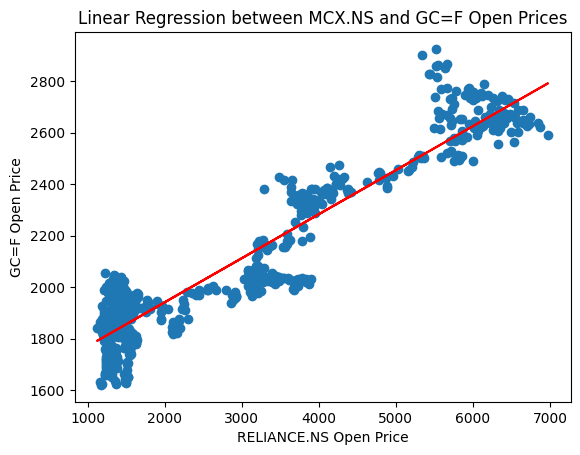

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Get the minimum length between data_s['Open'] and data_gld['Open']
min_len = min(len(data_s['Open']), len(data_oil['Open']))

# Truncate both series to the minimum length
X = data_s['Open'][:min_len]
y = data_gld['Open'][:min_len]

reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)  # Reshape X for LinearRegression

predictions_model1 = reg.predict(X.values.reshape(-1, 1)) # Assuming predictions_model1 is defined somewhere

plt.scatter(X, y)
plt.plot(X, predictions_model1, color='red')  # Regression line, using X for plotting
plt.xlabel("RELIANCE.NS Open Price")  # Updated x-axis label
plt.ylabel("GC=F Open Price")    # Updated y-axis label
plt.title("Linear Regression between MCX.NS and GC=F Open Prices")  # Updated title
plt.show()

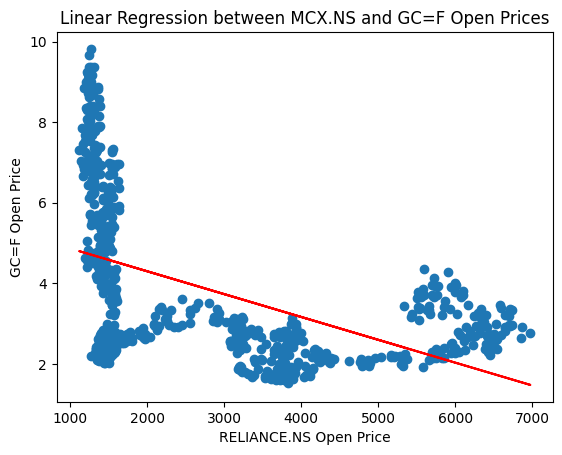

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Get the minimum length between data_s['Open'] and data_gld['Open']
min_len = min(len(data_s['Open']), len(data_ngas['Open']))

# Truncate both series to the minimum length
X = data_s['Open'][:min_len]
y = data_ngas['Open'][:min_len]

reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)  # Reshape X for LinearRegression

predictions_model1 = reg.predict(X.values.reshape(-1, 1)) # Assuming predictions_model1 is defined somewhere

plt.scatter(X, y)
plt.plot(X, predictions_model1, color='red')  # Regression line, using X for plotting
plt.xlabel("RELIANCE.NS Open Price")  # Updated x-axis label
plt.ylabel("GC=F Open Price")    # Updated y-axis label
plt.title("Linear Regression between MCX.NS and GC=F Open Prices")  # Updated title
plt.show()

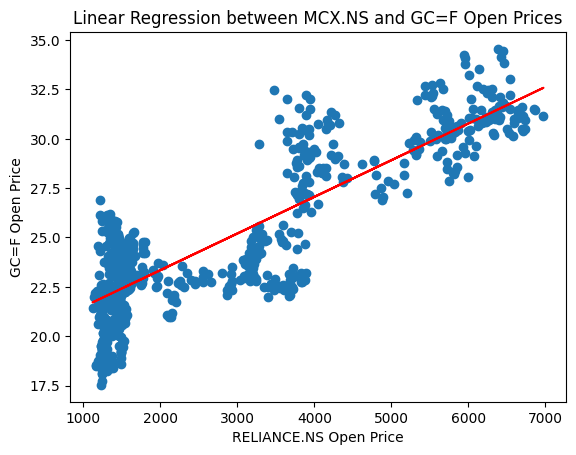

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Get the minimum length between data_s['Open'] and data_gld['Open']
min_len = min(len(data_s['Open']), len(data_silver['Open']))

# Truncate both series to the minimum length
X = data_s['Open'][:min_len]
y = data_silver['Open'][:min_len]

reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)  # Reshape X for LinearRegression

predictions_model1 = reg.predict(X.values.reshape(-1, 1)) # Assuming predictions_model1 is defined somewhere

plt.scatter(X, y)
plt.plot(X, predictions_model1, color='red')  # Regression line, using X for plotting
plt.xlabel("RELIANCE.NS Open Price")  # Updated x-axis label
plt.ylabel("GC=F Open Price")    # Updated y-axis label
plt.title("Linear Regression between MCX.NS and GC=F Open Prices")  # Updated title
plt.show()

In [ ]:
import pandas as pd

# Get the minimum length among the data columns
min_len = min(len(data_gld['Open']), len(data_silver['Open']), len(data_oil['Open']), len(data_ngas['Open']), len(data_s['Up_or_Down']),len(data_s['Open']))

# Truncate the data columns to the minimum length
data = {
    'g': data_gld['Open'].values.ravel()[:min_len],
    's': data_silver['Open'].values.ravel()[:min_len],
    'o': data_oil['Open'].values.ravel()[:min_len],
    'n': data_ngas['Open'].values.ravel()[:min_len],
    'p': data_s['Open'].values.ravel()[:min_len],
    'target': data_s['Up_or_Down'].values.ravel()[:min_len]
}

# Create the DataFrame with the truncated data and the index
index = data_gld.index[:min_len]  # Adjust the index length as well
d = pd.DataFrame(data, index)
d.head()

,g,s,o,n,p,target
Date,,,,,,
2022-01-03,1830.099976,23.309999,75.690002,3.702,1545.030781,0
2022-01-04,1800.500000,22.955000,76.019997,3.817,1578.152477,1
2022-01-05,1813.099976,23.139999,77.180000,3.747,1578.152411,0
2022-01-06,1787.099976,22.764999,77.239998,3.842,1552.824012,0
2022-01-07,1791.800049,22.393999,79.620003,3.860,1591.255024,1


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [ ]:
#create model
class Model(nn.Module):
  def __init__(self,in_features=5,h1=5,h2=4,out_features=2):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
      x=f.relu(self.fc1(x))
      x=f.relu(self.fc2(x))
      x=self.out(x)
      return x

In [ ]:
torch.manual_seed(32)
model=Model()

In [ ]:
X=d.drop(columns=['target'])
Y=d["target"]
x=X.values
y=Y.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [ ]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.000000001)

In [ ]:
epochs=200
losses=[]
for i in range(epochs):
  i+=1
  y_pred=model.forward(x_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i%10 ==0:
    print(f'epochs: {i}and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epochs: 10and loss: 65.55318450927734
epochs: 20and loss: 65.55318450927734
epochs: 30and loss: 65.55318450927734
epochs: 40and loss: 65.55317687988281
epochs: 50and loss: 65.55317687988281
epochs: 60and loss: 65.55316925048828
epochs: 70and loss: 65.55316925048828
epochs: 80and loss: 65.55316925048828
epochs: 90and loss: 65.55316925048828
epochs: 100and loss: 65.55316925048828
epochs: 110and loss: 65.55316162109375
epochs: 120and loss: 65.55315399169922
epochs: 130and loss: 65.55315399169922
epochs: 140and loss: 65.55315399169922
epochs: 150and loss: 65.55315399169922
epochs: 160and loss: 65.55314636230469
epochs: 170and loss: 65.55314636230469
epochs: 180and loss: 65.55313873291016
epochs: 190and loss: 65.55313873291016
epochs: 200and loss: 65.55313873291016


In [ ]:
epochs = 200
losses = []

for i in range(epochs):
    # Forward pass: Generate predictions using the model
    y_pred = model(x_train)  # Use the updated `forward` method implicitly

    # Compute loss
    loss = criterion(y_pred, y_train)  # Criterion is already set as nn.MSELoss

    # Append loss value for visualization later
    losses.append(loss.item())  # Use .item() to get the scalar value of the loss tensor

    # Print loss every 10 epochs for monitoring
    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss.item()}')

    # Backpropagation and optimization
    optimizer.zero_grad()  # Reset gradients
    loss.backward()        # Backpropagate the loss
    optimizer.step()       # Update model parameters


Epoch: 0, Loss: 65.55313873291016
Epoch: 10, Loss: 65.55313873291016
Epoch: 20, Loss: 65.5531234741211
Epoch: 30, Loss: 65.5531234741211
Epoch: 40, Loss: 65.5531234741211
Epoch: 50, Loss: 65.5531234741211
Epoch: 60, Loss: 65.5531234741211
Epoch: 70, Loss: 65.5531234741211
Epoch: 80, Loss: 65.55311584472656
Epoch: 90, Loss: 65.55311584472656
Epoch: 100, Loss: 65.55311584472656
Epoch: 110, Loss: 65.55311584472656
Epoch: 120, Loss: 65.55311584472656
Epoch: 130, Loss: 65.55311584472656
Epoch: 140, Loss: 65.55311584472656
Epoch: 150, Loss: 65.55311584472656
Epoch: 160, Loss: 65.55310821533203
Epoch: 170, Loss: 65.55310821533203
Epoch: 180, Loss: 65.55310821533203
Epoch: 190, Loss: 65.5531005859375


Text(0.5, 0, 'Epochs')

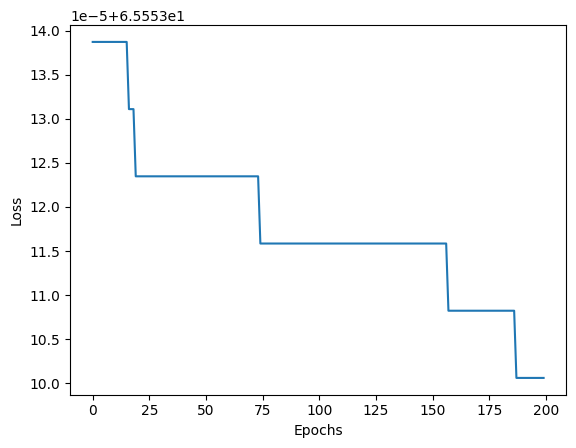

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=criterion(y_eval,y_test)

In [ ]:
loss

tensor(58.2224)

In [ ]:
correct=0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val=model.forward(data)

    print(f'{i+1:2}. {str(data)}\t {y_test[i]} ')
    if y_val.argmax().item() == y_test[i]:
      correct+=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}%')

 1. tensor([1960.0000,   23.9200,   71.9400,    2.6150, 1356.4448])	 1 
 2. tensor([1790.5000,   21.0950,  110.9800,    7.7000, 1212.8394])	 1 
 3. tensor([1933.9000,   25.2000,   95.3400,    4.7470, 1384.7800])	 1 
 4. tensor([1963.2000,   23.8750,   67.6000,    2.2550, 1481.4196])	 1 
 5. tensor([1693.4000,   19.6900,   93.4800,    6.6470, 1309.2708])	 1 
 6. tensor([2.1827e+03, 2.4640e+01, 8.1940e+01, 1.6640e+00, 3.6252e+03])	 1 
 7. tensor([1859.0000,   21.7800,   79.9400,    2.5800, 1388.0591])	 0 
 8. tensor([1741.7000,   21.0750,   80.2200,    6.7030, 1560.9489])	 1 
 9. tensor([2.0325e+03, 2.3205e+01, 7.7020e+01, 2.6800e+00, 3.8951e+03])	 1 
10. tensor([1998.0000,   25.2300,   78.8700,    2.1790, 1377.2411])	 0 
11. tensor([1941.7000,   23.8910,   68.7000,    2.3460, 1595.3787])	 1 
12. tensor([1930.5000,   25.3050,  111.3300,    4.7950, 1361.7898])	 1 
13. tensor([2.7137e+03, 3.3032e+01, 7.0750e+01, 2.3770e+00, 6.5380e+03])	 1 
14. tensor([1657.0000,   18.7650,   81.9000,    7

PREPROCESSING DATA

In [ ]:
import yfinance as yf

# Fetch data for a commodity (example: Gold 'GC=F')
data = yf.download('GC=F', start="2010-01-01", end="2025-01-01")

# Check the first few rows to see the column names and data structure
print(data.head())  # Display the first 5 rows
print(data.columns)  # List all column names

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951    184
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976     53
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024    363
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976     56
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951     54
MultiIndex([( 'Close', 'GC=F'),
            (  'High', 'GC=F'),
            (   'Low', 'GC=F'),
            (  'Open', 'GC=F'),
            ('Volume', 'GC=F')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed

Columns in the fetched data: MultiIndex([( 'Close', 'GC=F'),
            (  'High', 'GC=F'),
            (   'Low', 'GC=F'),
            (  'Open', 'GC=F'),
            ('Volume', 'GC=F')],
           names=['Price', 'Ticker'])
First few rows of the data:
Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951    184
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976     53
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024    363
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976     56
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951     54
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0101 - val_loss: 6.5638e-04
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 3.9860e-04 - val_loss: 6.7051e-04
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 4.1014e-04 - val_loss: 5.2805e-04
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 3.0002e-04 - val_loss: 5.6415e-04
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 3.1105e-04 - val_loss: 7.7504e-04
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 2.9717e-04 - val_loss: 6.1344e-04
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 2.5462e-04 - val_loss: 8.3625e-04
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 2.5478e-04 - val_loss: 5.4544e-04
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 2.2624e-04 - val_loss: 6.9559e-04
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 1.8849e-04 - val_loss: 5.9627e-04
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


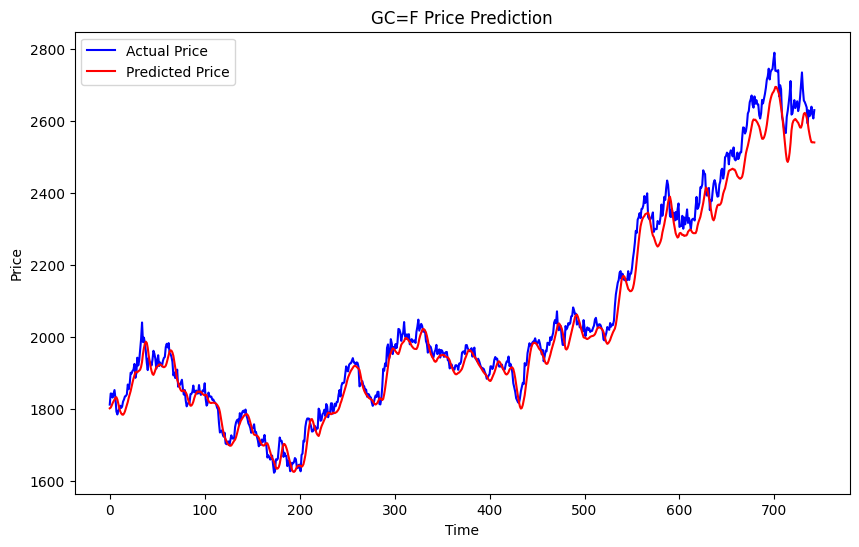

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to fetch and preprocess data for the commodity
def fetch_and_preprocess_data(ticker, start_date="2010-01-01", end_date="2025-01-01"):
    # Fetch data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Check the first few rows and columns
    print(f"Columns in the fetched data: {data.columns}")
    print(f"First few rows of the data:\n{data.head()}")

    # Ensure 'Close' or 'Adj Close' column exists
    if 'Close' in data.columns:
        data_close = data['Close'].values
    elif 'Adj Close' in data.columns:
        data_close = data['Adj Close'].values
    else:
        raise ValueError(f"Error: No valid price column found in the data for {ticker}.")

    # Reshape the data to a 2D array (samples, 1 feature)
    data_close = data_close.reshape(-1, 1)

    # Scale the data using MinMaxScaler to the range [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_close)

    return scaled_data, scaler

# Function to create sequences for LSTM model
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Previous 'time_step' days as features
        y.append(data[i, 0])  # Next day's price as label
    return np.array(X), np.array(y)

# Function to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))  # Output layer: single value (price)

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Main function to train the LSTM model for predicting commodity prices
def train_and_predict(ticker):
    # Preprocess data
    scaled_data, scaler = fetch_and_preprocess_data(ticker)

    # Create sequences of data for training
    time_step = 60
    X, y = create_sequences(scaled_data, time_step)

    # Split data into training and test sets (80% for training, 20% for testing)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input data to 3D shape for LSTM (samples, time_steps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build the LSTM model
    model = build_lstm_model((X_train.shape[1], 1))

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Predict the stock prices on the test set
    predicted_prices = model.predict(X_test)

    # Inverse transform the predictions and actual values
    predicted_prices = scaler.inverse_transform(predicted_prices)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the predicted vs actual prices
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, color='blue', label='Actual Price')
    plt.plot(predicted_prices, color='red', label='Predicted Price')
    plt.title(f'{ticker} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example: Predict prices for Gold (GC=F)
train_and_predict('GC=F')  # You can change the ticker to 'SLV', 'CL=F', 'NG=F' for other commodities

[*********************100%***********************]  1 of 1 completed

Columns in the fetched data: MultiIndex([( 'Close', 'GC=F'),
            (  'High', 'GC=F'),
            (   'Low', 'GC=F'),
            (  'Open', 'GC=F'),
            ('Volume', 'GC=F')],
           names=['Price', 'Ticker'])
First few rows of the data:
Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951    184
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976     53
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024    363
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976     56
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951     54
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0115 - val_loss: 7.0064e-04
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 3.8917e-04 - val_loss: 6.4678e-04
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 3.7985e-04 - val_loss: 6.6161e-04
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 3.6364e-04 - val_loss: 6.3528e-04
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 2.8896e-04 - val_loss: 8.4194e-04
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 3.0822e-04 - val_loss: 5.6093e-04
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 2.8488e-04 - val_loss: 7.7161e-04
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.8751e-04 - val_loss: 0.0017
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 2.5108e-04 - val_loss: 8.0171e-04
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 2.7740e-04 - val_loss: 6.2715e-04
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


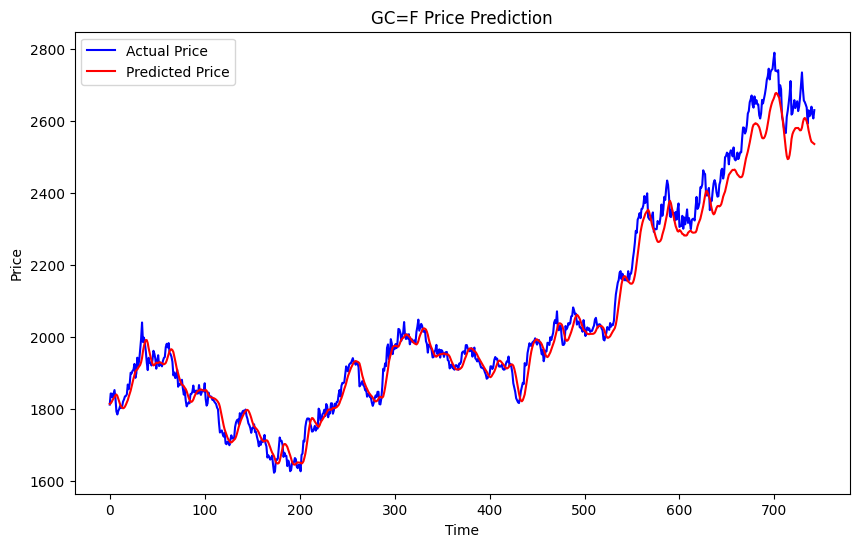

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Columns in the fetched data: MultiIndex([( 'Close', 'SLV'),
            (  'High', 'SLV'),
            (   'Low', 'SLV'),
            (  'Open', 'SLV'),
            ('Volume', 'SLV')],
           names=['Price', 'Ticker'])
First few rows of the data:
Price           Close       High        Low       Open    Volume
Ticker            SLV        SLV        SLV        SLV       SLV
Date                                                            
2010-01-04  17.230000  17.250000  17.020000  17.049999   9720500
2010-01-05  17.510000  17.549999  17.180000  17.240000  13318600
2010-01-06  17.860001  17.900000  17.629999  17.660000  14047000
2010-01-07  17.889999  18.020000  17.799999  17.860001  12587200
2010-01-08  18.150000  18.160000  17.930000  18.139999  11736100
Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0139 - val_loss: 6.6394e-04
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0010 - val_loss: 6.3426e-04
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/st

KeyboardInterrupt: 

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to fetch and preprocess data for the commodity
def fetch_and_preprocess_data(ticker, start_date="2010-01-01", end_date="2025-01-01"):
    # Fetch data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Check the first few rows and columns
    print(f"Columns in the fetched data: {data.columns}")
    print(f"First few rows of the data:\n{data.head()}")

    # Ensure 'Close' or 'Adj Close' column exists
    if 'Close' in data.columns:
        data_close = data['Close'].values
    elif 'Adj Close' in data.columns:
        data_close = data['Adj Close'].values
    else:
        raise ValueError(f"Error: No valid price column found in the data for {ticker}.")

    # Reshape the data to a 2D array (samples, 1 feature)
    data_close = data_close.reshape(-1, 1)

    # Scale the data using MinMaxScaler to the range [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_close)

    return scaled_data, scaler

# Function to create sequences for LSTM model
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Previous 'time_step' days as features
        y.append(data[i, 0])  # Next day's price as label
    return np.array(X), np.array(y)

# Function to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))  # Output layer: single value (price)

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Main function to train the LSTM model for predicting commodity prices
def train_and_predict(ticker):
    # Preprocess data
    scaled_data, scaler = fetch_and_preprocess_data(ticker)

    # Create sequences of data for training
    time_step = 60
    X, y = create_sequences(scaled_data, time_step)

    # Split data into training and test sets (80% for training, 20% for testing)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input data to 3D shape for LSTM (samples, time_steps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build the LSTM model
    model = build_lstm_model((X_train.shape[1], 1))

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Predict the stock prices on the test set
    predicted_prices = model.predict(X_test)

    # Inverse transform the predictions and actual values
    predicted_prices = scaler.inverse_transform(predicted_prices)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the predicted vs actual prices
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, color='blue', label='Actual Price')
    plt.plot(predicted_prices, color='red', label='Predicted Price')
    plt.title(f'{ticker} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example: Predict prices for Gold (GC=F)
train_and_predict('GC=F')  # For Gold
train_and_predict('SLV')   # For Silver
train_and_predict('CL=F')  # For Crude Oil
train_and_predict('NG=F')  # For Natural Gas

[**********************60%****                   ]  3 of 5 completedERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/%5EMCX.NS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=%5EMCX.NS&crumb=GGtiAnyy6NU
[*********************100%***********************]  5 of 5 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^MCX.NS']: AttributeError("'NoneType' object has no attribute 'update'")


Epoch 1/100


<ipython-input-16-e58cd82ea437>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: nan - val_loss: nan
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: nan - val_loss: nan
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: nan - val_loss: nan
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: nan - val_loss: nan
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: nan - val_loss: nan
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: nan - val_loss: nan
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: nan - val_loss: nan
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: nan - val_loss: nan
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: nan - val_loss: nan
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: nan - val_loss: nan
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: nan - val_loss: nan
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: nan - val_loss: nan
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/

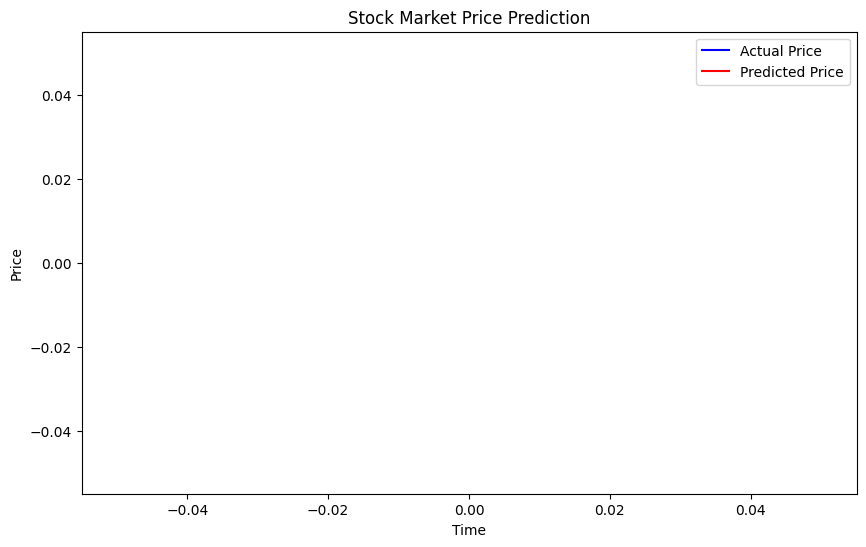


Blockchain of Predicted Stock Prices:
Index: 0, Data: Genesis Block, Hash: 53fddec1612f967ca5cb5d1805d3938bf3f024de8b991d06753f5204710f4d73
Index: 1, Data: Day 1 - Predicted Price: nan, Hash: f8af780c53b021dcacca65770fdef407b44d40acc6033c99165ec2ede110b1e3
Index: 2, Data: Day 2 - Predicted Price: nan, Hash: 1fbf5a7e7fb16f217acaee425518e00ee06339521d2e32a404ef35e626141000
Index: 3, Data: Day 3 - Predicted Price: nan, Hash: d77d748ae52e3775fa3a02cfc8a694874f10786a10453128c50f2ad9f7dfbebd
Index: 4, Data: Day 4 - Predicted Price: nan, Hash: 6297c6245acb5746c21b5907d8b75539ceb9da6b098b628d164b03f0a15d2b9f
Index: 5, Data: Day 5 - Predicted Price: nan, Hash: 6d11fc2192276306bd06eb31ea884fe8d673416686c8d2dde96ea75bbc89484a
Index: 6, Data: Day 6 - Predicted Price: nan, Hash: 6a25215cf48b95e7b8ee649e538f358c3cf50fbbfc0bd87e9c3919c37a9e10d4
Index: 7, Data: Day 7 - Predicted Price: nan, Hash: adfa301c11215e415bd8d01fd75d3cbc02d25c2fb2131db08f34fd5eb6daae87
Index: 8, Data: Day 8 - Predicted Price:

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import hashlib
import time

# Define the tickers
tickers = ['NG=F', 'GC=F', 'SI=F', 'CL=F', '^MCX.NS']

# Function to fetch and preprocess data
def fetch_and_preprocess_data(tickers, start_date='2022-01-01', end_date='2025-03-01'):
    data = yf.download(tickers, start=start_date, end=end_date)
    data = data['Close']
    data.fillna(method='ffill', inplace=True)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler, data

# Create LSTM input sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i, -1])  # Predicting only stock index (^MCX.NS)
    return np.array(X), np.array(y)

# LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Blockchain classes
class Block:
    def __init__(self, index, data, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "Genesis Block", "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        prev_block = self.get_latest_block()
        new_block = Block(len(self.chain), data, prev_block.hash)
        self.chain.append(new_block)

# Train, predict, and store in blockchain
def train_and_predict(tickers):
    scaled_data, scaler, original_data = fetch_and_preprocess_data(tickers)
    time_step = 60
    X, y = create_sequences(scaled_data, time_step)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

    predicted = model.predict(X_test)

    # Inverse transform
    predicted_full = np.concatenate((scaled_data[-len(predicted):, :-1], predicted), axis=1)
    predicted_prices = scaler.inverse_transform(predicted_full)[:, -1]

    y_test_actual = original_data['^MCX.NS'][-len(predicted_prices):].values

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, label='Actual Price', color='blue')
    plt.plot(predicted_prices, label='Predicted Price', color='red')
    plt.title('Stock Market Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Blockchain part
    stock_chain = Blockchain()
    for i, price in enumerate(predicted_prices[:10]):
        data = f"Day {i+1} - Predicted Price: {price:.2f}"
        stock_chain.add_block(data)

    print("\nBlockchain of Predicted Stock Prices:")
    for block in stock_chain.chain:
        print(f"Index: {block.index}, Data: {block.data}, Hash: {block.hash}")

# Run the function
train_and_predict(tickers)

[*********************100%***********************]  5 of 5 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^MCX.NS']: YFTzMissingError('possibly delisted; no timezone found')
<ipython-input-27-e0b0f3cec388>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: nan - val_loss: nan
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: nan - val_loss: nan
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: nan - val_loss: nan
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: nan - val_loss: nan
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: nan - val_loss: nan
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: nan - val_loss: nan
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: nan - val_loss: nan
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: nan - val_loss: nan
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: nan - val_loss: nan
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: nan - val_loss: nan
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: nan - val_loss: nan
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: nan - val_loss: nan
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


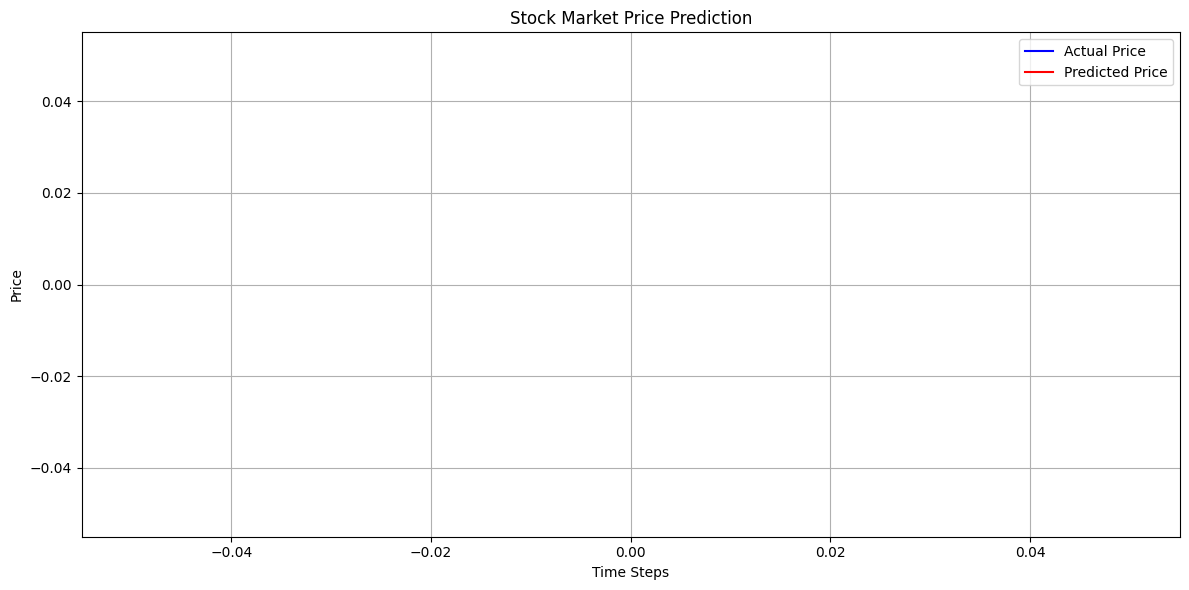


Blockchain of Predicted Stock Prices:
Index: 0, Data: Genesis Block, Hash: 840f974ca1b780812f9d068be05dfcb54652bed796f3b20c49fc1651191052c5
Index: 1, Data: Day 1 - Predicted Price: nan, Hash: a1c83beeaf04575dfc034ae484f9d13f213e2ac9d544c5af3883dc1a0c8d7741
Index: 2, Data: Day 2 - Predicted Price: nan, Hash: 411368b51b2aa98d69600d01e5dd1efbaac833e72d26611760678c91966d8682
Index: 3, Data: Day 3 - Predicted Price: nan, Hash: 02403e231d60a2c9e56fa0e406c91098ae619c5da907d27b4cfecb9c44cdfaac
Index: 4, Data: Day 4 - Predicted Price: nan, Hash: 8ad66dba23a35d26d19c9abf9e95a841a8f55c70f7e9761407b89b25f4d4d5aa
Index: 5, Data: Day 5 - Predicted Price: nan, Hash: 47b7d09231f30c56c1776a8363398ac0774167e96e339053b72038225932376d
Index: 6, Data: Day 6 - Predicted Price: nan, Hash: 3fc1e7375021cd018bdcdaf538065cde3d4cdf2cfc5318447b8e3e6fdb87344e
Index: 7, Data: Day 7 - Predicted Price: nan, Hash: 873a31caa5d7ac900380d573486d358a8c4594384d4dcf48069ba95ed28b68fa
Index: 8, Data: Day 8 - Predicted Price:

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import hashlib
import time

# Define the tickers
tickers = ['NG=F', 'GC=F', 'SI=F', 'CL=F', '^MCX.NS']

# Function to fetch and preprocess data
def fetch_and_preprocess_data(tickers, start_date='2022-01-01', end_date='2025-03-01'):
    data = yf.download(tickers, start=start_date, end=end_date)
    data = data['Close']
    data.fillna(method='ffill', inplace=True)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler, data

# Create LSTM input sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i, -1])  # Predicting only stock index (^MCX.NS)
    return np.array(X), np.array(y)

# LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Blockchain classes
class Block:
    def __init__(self, index, data, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "Genesis Block", "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        prev_block = self.get_latest_block()
        new_block = Block(len(self.chain), data, prev_block.hash)
        self.chain.append(new_block)

# Train, predict, and store in blockchain
def train_and_predict(tickers):
    scaled_data, scaler, original_data = fetch_and_preprocess_data(tickers)
    time_step = 60
    X, y = create_sequences(scaled_data, time_step)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

    # Predict
    predicted = model.predict(X_test)

    # Fix: Use a separate scaler for just the target (^MCX.NS)
    target_scaler = MinMaxScaler(feature_range=(0, 1))
    target_column = original_data['^MCX.NS'].values.reshape(-1, 1)
    target_scaler.fit(target_column)

    # Inverse transform the predictions and actual values
    predicted_prices = target_scaler.inverse_transform(predicted)
    y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_actual, label='Actual Price', color='blue')
    plt.plot(predicted_prices, label='Predicted Price', color='red')
    plt.title('Stock Market Price Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Blockchain part
    stock_chain = Blockchain()
    for i, price in enumerate(predicted_prices[:10]):
        data = f"Day {i+1} - Predicted Price: {price[0]:.2f}"
        stock_chain.add_block(data)

    print("\nBlockchain of Predicted Stock Prices:")
    for block in stock_chain.chain:
        print(f"Index: {block.index}, Data: {block.data}, Hash: {block.hash}")

# Run the function
train_and_predict(tickers)

[*********************100%***********************]  5 of 5 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0585 - val_loss: 0.0083
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0024 - val_loss: 0.0047
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 9.8362e-04 - val_loss: 0.0031
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 9.9516e-04 - val_loss: 0.0038
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 9.2473e-04 - val_loss: 0.0079
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0012 - val_loss: 0.0057
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 8.9279e-04 - val_loss: 0.0021
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss

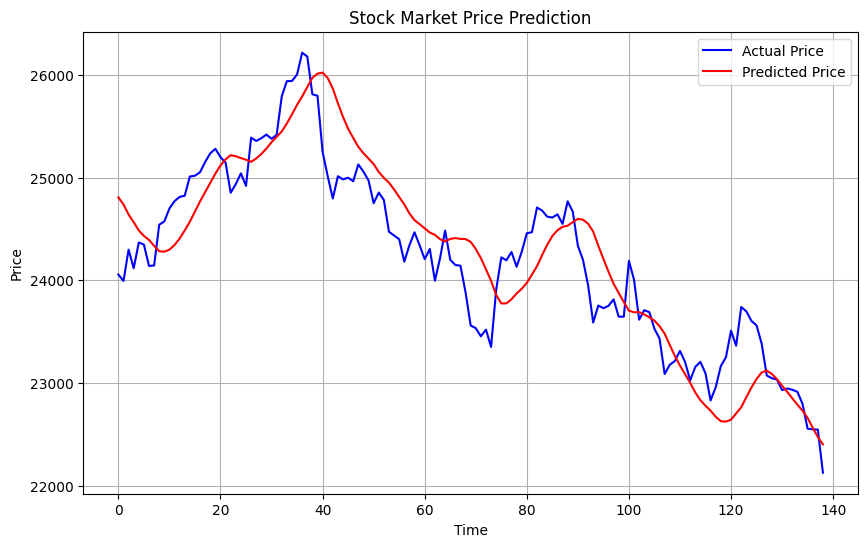


Blockchain of Predicted Stock Prices:
Index: 0, Data: Genesis Block, Hash: 0f9313c5ab1bac3c2ae40712cb497c97ad5e28e220e27568550fb62f686263b6
Index: 1, Data: Day 1 - Predicted Price: 24806.70, Hash: ecf33b5f26f03b56bbd70570eceb2883c256c31e7713afee7ed4513cc22ecf00
Index: 2, Data: Day 2 - Predicted Price: 24738.46, Hash: 137c3d41c3ddec2ecee1a160a7bb72c6f059224a26160ac5cc30fa85cda04bbc
Index: 3, Data: Day 3 - Predicted Price: 24639.87, Hash: 0eb7a5b976f1d26c73ccff4bb854ae6ad27cfc9381b94f774b8641f098108c4d
Index: 4, Data: Day 4 - Predicted Price: 24565.16, Hash: be6c3713e6795ef4a76a065bdaf114507667ed01baec143189cd6e32033bd700
Index: 5, Data: Day 5 - Predicted Price: 24483.99, Hash: 866ffc9aff5bdb3a496b9f389083a969809c08414b5316faabfdab8ad2dac087
Index: 6, Data: Day 6 - Predicted Price: 24431.90, Hash: 9bfd90c1a12ce7b3f43573733ca6240156a34a512a0d83a9d00f61629762c0c6
Index: 7, Data: Day 7 - Predicted Price: 24392.08, Hash: 7913daaa3c55df1fb93ebd5ed2bcd7e72466687707e01d7f4c4c4f89675849f7
Index

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import hashlib
import time

# Define the tickers (you can change '^NSEI' to any working stock index)
tickers = ['NG=F', 'GC=F', 'SI=F', 'CL=F', '^NSEI']

# Function to fetch and preprocess data
def fetch_and_preprocess_data(tickers, start_date='2022-01-01', end_date='2025-03-01'):
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    data.dropna(axis=0, inplace=True)  # Drop rows with any NaNs
    if data.empty:
        raise ValueError("Downloaded data is empty. Please check tickers or date range.")
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler, data

# Create LSTM input sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i, -1])  # Predicting only the last column (index value)
    return np.array(X), np.array(y)

# LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Blockchain classes
class Block:
    def __init__(self, index, data, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, "Genesis Block", "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        prev_block = self.get_latest_block()
        new_block = Block(len(self.chain), data, prev_block.hash)
        self.chain.append(new_block)

# Train, predict, and store in blockchain
def train_and_predict(tickers):
    scaled_data, scaler, original_data = fetch_and_preprocess_data(tickers)
    time_step = 60
    X, y = create_sequences(scaled_data, time_step)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    predicted = model.predict(X_test)

    # Check for errors
    if np.isnan(predicted).any() or len(predicted) == 0:
        print("Prediction failed due to NaN values.")
        return

    # Inverse transform
    predicted_full = np.concatenate((scaled_data[-len(predicted):, :-1], predicted), axis=1)
    predicted_prices = scaler.inverse_transform(predicted_full)[:, -1]

    actual_prices = original_data[original_data.columns[-1]][-len(predicted_prices):].values

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(actual_prices, label='Actual Price', color='blue')
    plt.plot(predicted_prices, label='Predicted Price', color='red')
    plt.title('Stock Market Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Blockchain part
    stock_chain = Blockchain()
    for i, price in enumerate(predicted_prices[:10]):
        data = f"Day {i+1} - Predicted Price: {price:.2f}"
        stock_chain.add_block(data)

    print("\nBlockchain of Predicted Stock Prices:")
    for block in stock_chain.chain:
        print(f"Index: {block.index}, Data: {block.data}, Hash: {block.hash}")

# Run the function
train_and_predict(tickers)

In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Tickers for commodities and Reliance
tickers = {
    'crude_oil': 'CL=F',
    'natural_gas': 'NG=F',
    'gold': 'GC=F',
    'silver': 'SI=F',
    'reliance': 'RELIANCE.NS'
}

# Download data from Yahoo Finance
start_date = "2023-01-01"
end_date = "2025-03-1"

# Fetch and rename Close prices
dfs = []
for name, ticker in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date)[['Close']].rename(columns={'Close': name})
    dfs.append(df)

# Merge all dataframes on date
df = pd.concat(dfs, axis=1, join='inner')

# Drop rows with any missing values
df.dropna(inplace=True)

# Create target: 1 if Reliance price goes up next day, else 0
df['target'] = (df['reliance'].shift(-1) > df['reliance']).astype(int)

# Drop last row where target is NaN
df.dropna(inplace=True)

# Features and label
X = df[['crude_oil', 'natural_gas', 'gold', 'silver']]
y = df['target']

# Train-test split (no shuffling to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy as percentage
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Accuracy: 47.57%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.18      0.27        55
           1       0.46      0.81      0.59        48

    accuracy                           0.48       103
   macro avg       0.50      0.50      0.43       103
weighted avg       0.50      0.48      0.42       103

